In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import saida
import gerarnovapop
import buscalocal

# -------------------------
# Parâmetros ajustáveis
# -------------------------
NFP_INIT = 5
ALFA = 0.01
NEPOCA = 5

# Parâmetros AG / training
TAM_POP = 50
NUM_GERACOES = 300
TAXA_CRUZA = 0.75
TAXA_MUTA = 0.12
NFP_MAX = 5
FILE_XT = 'xt.csv'
FILE_YT = 'yt.csv'

# Early stopping
PATIENCE = 300              # número de gerações sem melhoria para parar
MIN_DELTA = 0.00005         # melhoria mínima considerada relevante

start_time = time.time()

# -------------------------
# Carregar dados
# -------------------------
_raw_X = np.loadtxt(FILE_XT, delimiter=',', skiprows=1)
xt_all = _raw_X[:, 1:]
_raw_y = np.loadtxt(FILE_YT, delimiter=',', skiprows=1)
yt_all = _raw_y[:, 1:].ravel()

npt_total, nin = xt_all.shape

# -------------------------
# Partição: 60% treino / 40% validação (Teste desativado)
# -------------------------
npt_tr = int(round(npt_total * 0.6))

indices = np.arange(len(xt_all))
xt_all = xt_all[indices]
yt_all = yt_all[indices]

xt = xt_all[:npt_tr, :].copy()       # treino (60%)
ydt = yt_all[:npt_tr].copy()         # y de treino

xv = xt_all[npt_tr:, :].copy()  # validação (xv)
ydv = yt_all[npt_tr:].copy()    # y validação (ydv)

npt = npt_tr

# -------------------------
# limites das features
# -------------------------
xmin = xt.min(axis=0)
xmax = xt.max(axis=0)
delta = (xmax - xmin) / (NFP_INIT - 1)

# -------------------------
# função gaussiana
# -------------------------
def gaussmf(x, mean, sigma):
    sigma = np.maximum(sigma, 1e-12)
    return np.exp(-((x - mean) ** 2) / (2.0 * sigma ** 2))

# helper para extrair predição do retorno de saida.saida(...)
def extract_prediction(saida_ret):
    """
    saida.saida pode retornar:
      - array_like (predicoes)
      - tuple/list (ys, w, y_vec, b) ou (y_pred_array, ...)
    Aqui pegamos o primeiro elemento se é tupla/lista, senão usamos direto.
    """
    if isinstance(saida_ret, (list, tuple)):
        return np.asarray(saida_ret[0]).ravel()
    else:
        return np.asarray(saida_ret).ravel()

# helper para extrair escalar de objeto possivelmente 0-d ou array com 1 elemento
def scalar_of(x):
    arr = np.asarray(x).ravel()
    return float(arr[0])


Execução:  {0}
-> Estado inicial salvo em init_state_0.pkl (pickle)
Geração 1/300
  Melhora detectada: best_error -> 0.004291 (reset patience)
Geração 2/300
  Melhora detectada: best_error -> 0.003511 (reset patience)
Geração 3/300
  Sem melhora significativa (1/300) - erro atual: 0.003489  melhor: 0.003511
Geração 4/300
  Melhora detectada: best_error -> 0.003433 (reset patience)
Geração 5/300
  Sem melhora significativa (1/300) - erro atual: 0.003413  melhor: 0.003433
Geração 6/300
  Melhora detectada: best_error -> 0.003310 (reset patience)
Geração 7/300
  Melhora detectada: best_error -> 0.003242 (reset patience)
Geração 8/300
  Melhora detectada: best_error -> 0.003179 (reset patience)
Geração 9/300
  Melhora detectada: best_error -> 0.003097 (reset patience)
Geração 10/300
  Melhora detectada: best_error -> 0.002971 (reset patience)
Geração 11/300
  Melhora detectada: best_error -> 0.002915 (reset patience)
Geração 12/300
  Sem melhora significativa (1/300) - erro atual: 0.002875

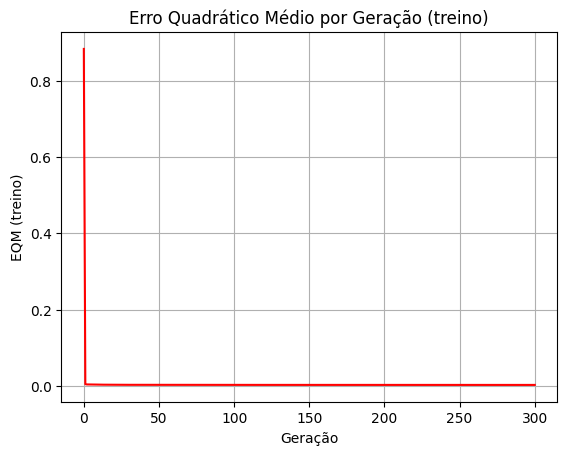

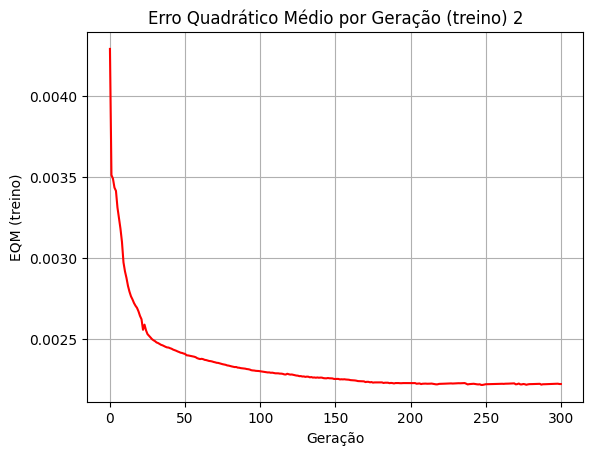

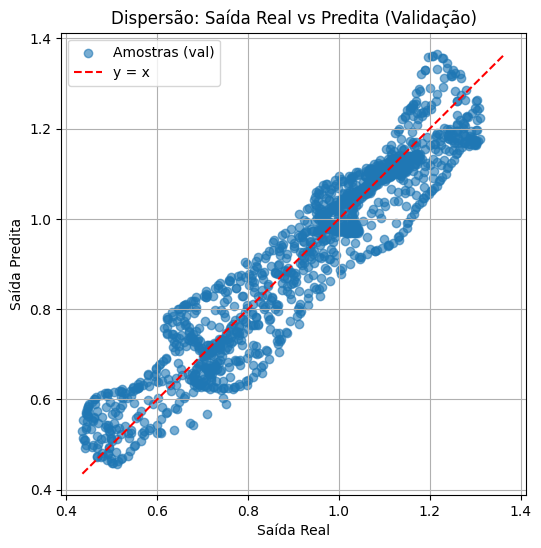


-> Estado final salvo em final_state_0.pkl

Execução:  {1}
-> Estado inicial salvo em init_state_1.pkl (pickle)
Geração 1/300
  Melhora detectada: best_error -> 0.004164 (reset patience)
Geração 2/300
  Melhora detectada: best_error -> 0.003860 (reset patience)
Geração 3/300
  Melhora detectada: best_error -> 0.003696 (reset patience)
Geração 4/300
  Melhora detectada: best_error -> 0.003601 (reset patience)
Geração 5/300
  Melhora detectada: best_error -> 0.003527 (reset patience)
Geração 6/300
  Melhora detectada: best_error -> 0.003465 (reset patience)
Geração 7/300
  Sem melhora significativa (1/300) - erro atual: 0.003417  melhor: 0.003465
Geração 8/300
  Melhora detectada: best_error -> 0.003395 (reset patience)
Geração 9/300
  Sem melhora significativa (1/300) - erro atual: 0.003386  melhor: 0.003395
Geração 10/300
  Melhora detectada: best_error -> 0.003272 (reset patience)
Geração 11/300
  Sem melhora significativa (1/300) - erro atual: 0.003223  melhor: 0.003272
Geração 12/3

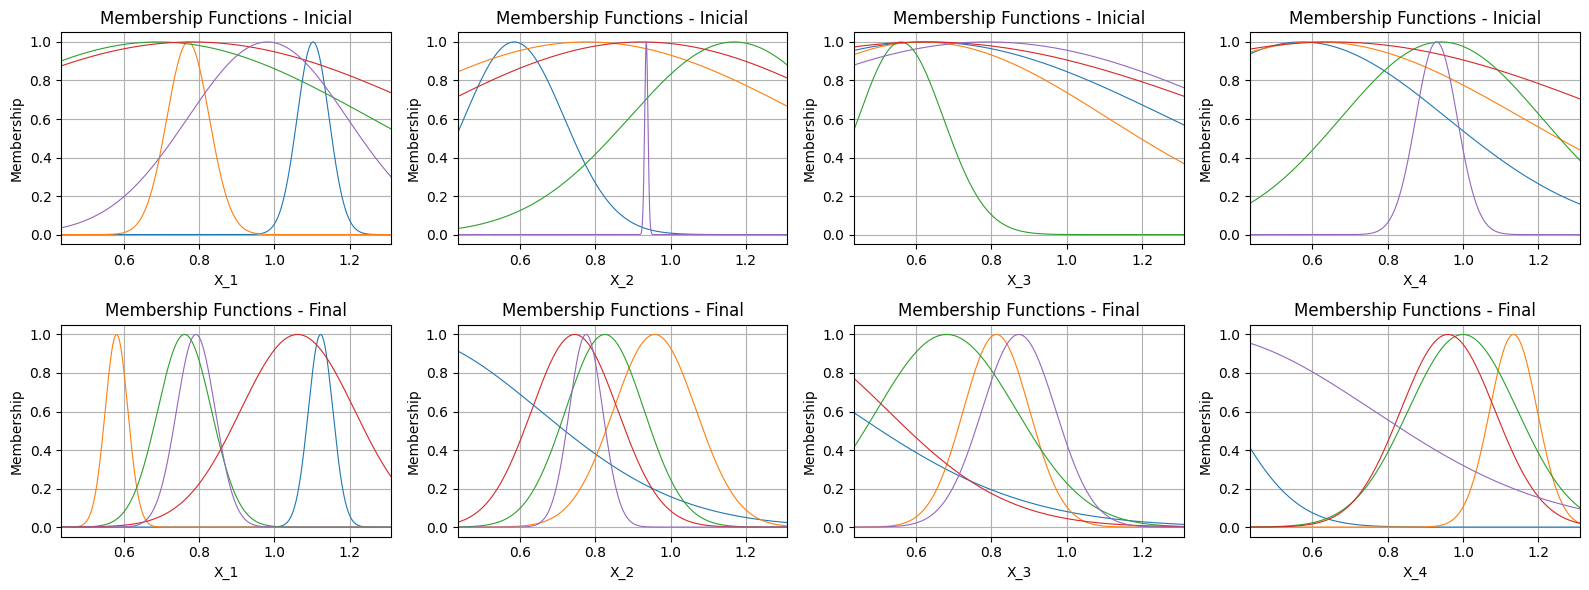

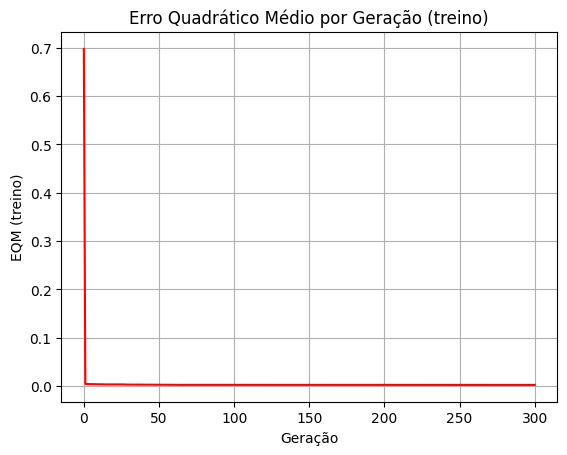

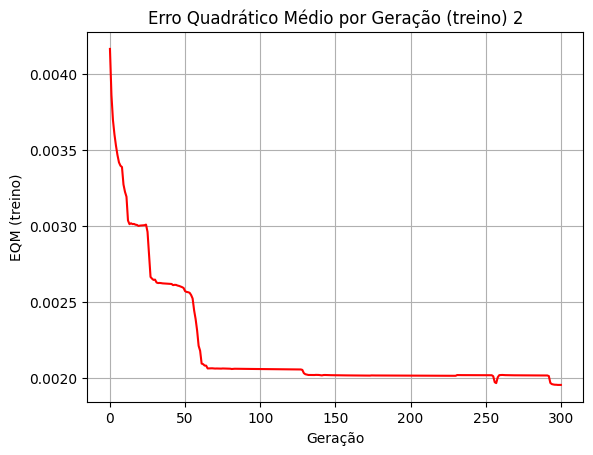

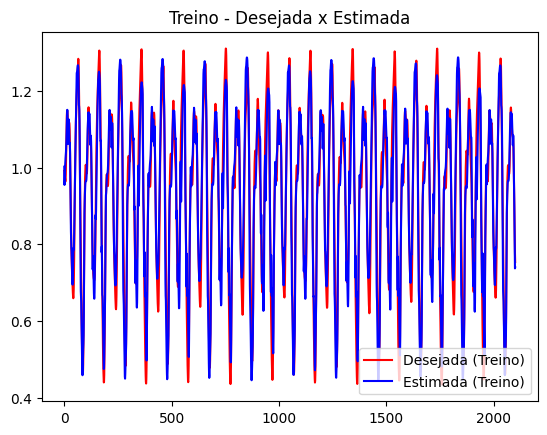

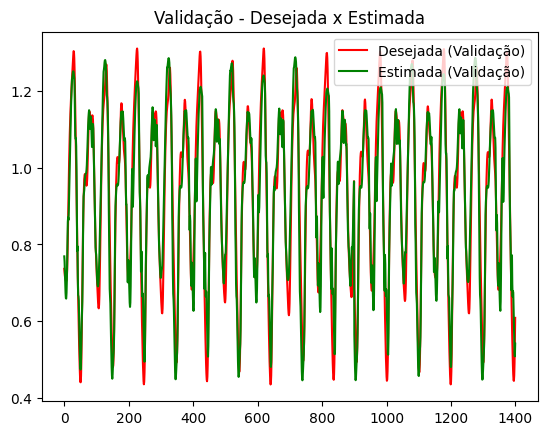

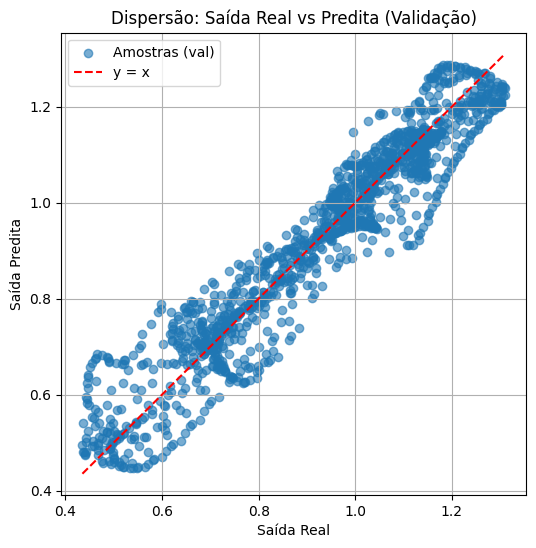


-> Estado final salvo em final_state_1.pkl

Execução:  {2}
-> Estado inicial salvo em init_state_2.pkl (pickle)
Geração 1/300
  Melhora detectada: best_error -> 0.004651 (reset patience)
Geração 2/300
  Melhora detectada: best_error -> 0.003692 (reset patience)
Geração 3/300
  Melhora detectada: best_error -> 0.003389 (reset patience)
Geração 4/300
  Melhora detectada: best_error -> 0.003148 (reset patience)
Geração 5/300
  Melhora detectada: best_error -> 0.003097 (reset patience)
Geração 6/300
  Melhora detectada: best_error -> 0.003003 (reset patience)
Geração 7/300
  Melhora detectada: best_error -> 0.002919 (reset patience)
Geração 8/300
  Melhora detectada: best_error -> 0.002840 (reset patience)
Geração 9/300
  Melhora detectada: best_error -> 0.002780 (reset patience)
Geração 10/300
  Melhora detectada: best_error -> 0.002663 (reset patience)
Geração 11/300
  Melhora detectada: best_error -> 0.002612 (reset patience)
Geração 12/300
  Melhora detectada: best_error -> 0.002550 (

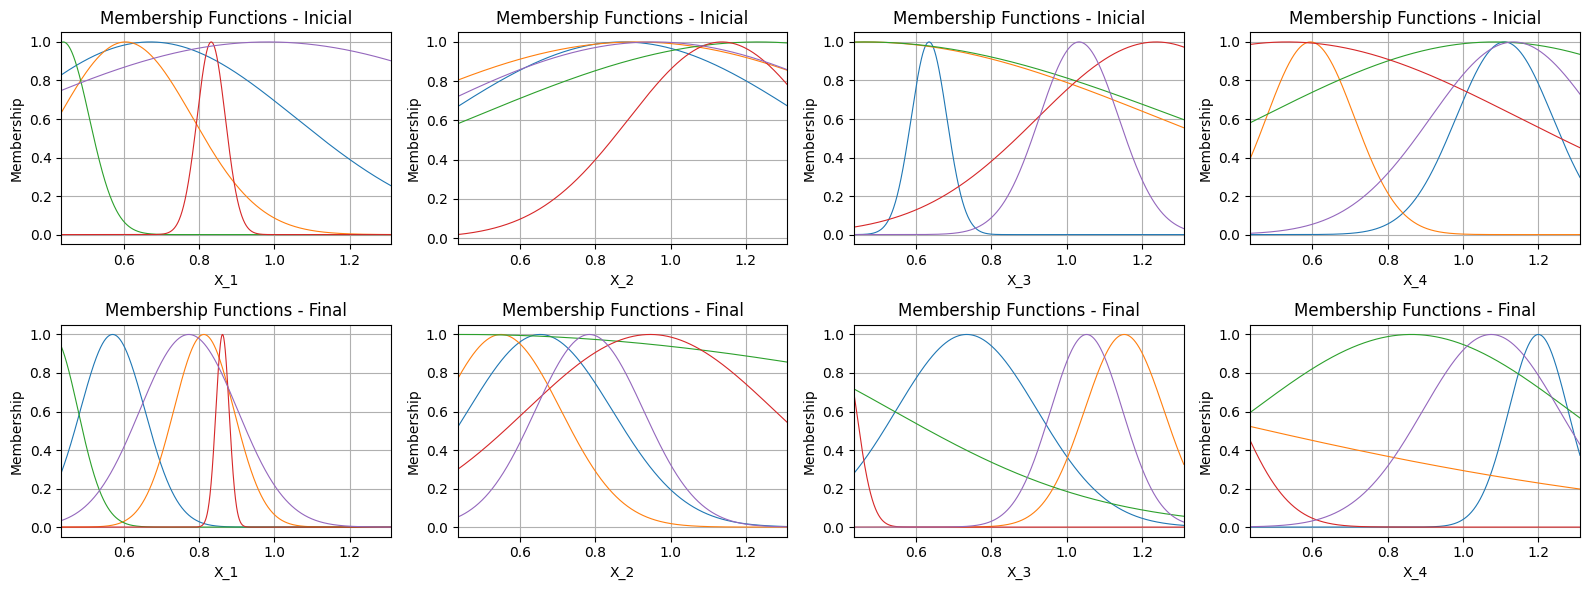

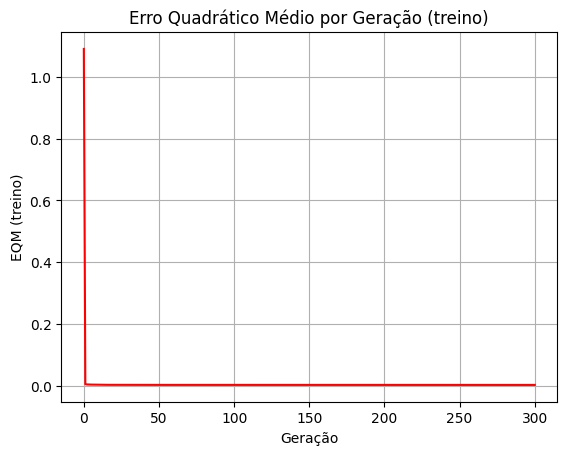

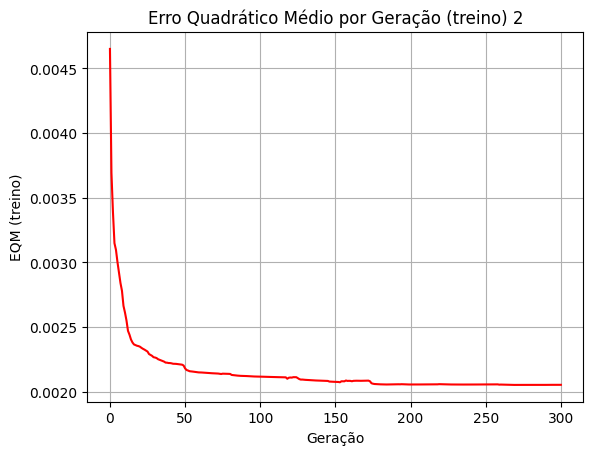

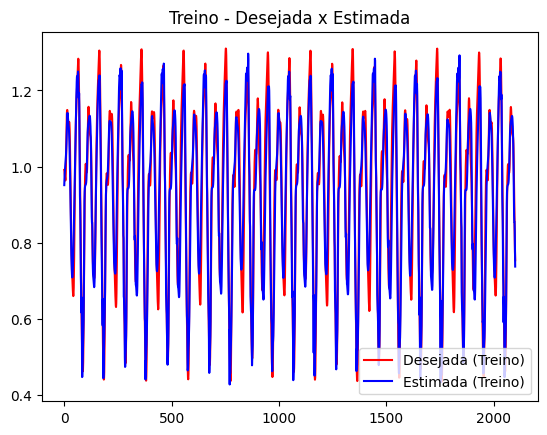

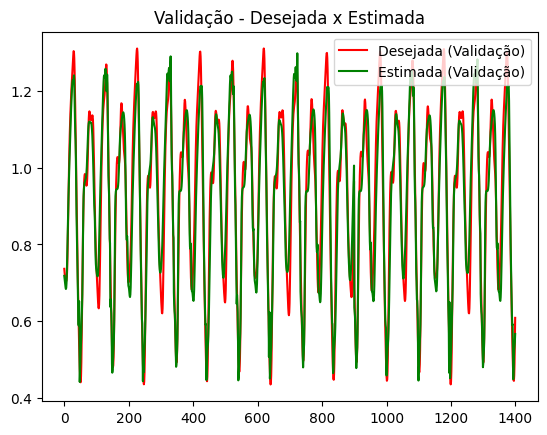


-> Estado final salvo em final_state_2.pkl

Execução:  {3}
-> Estado inicial salvo em init_state_3.pkl (pickle)
Geração 1/300
  Melhora detectada: best_error -> 0.004659 (reset patience)
Geração 2/300
  Melhora detectada: best_error -> 0.003897 (reset patience)
Geração 3/300
  Melhora detectada: best_error -> 0.003610 (reset patience)
Geração 4/300
  Melhora detectada: best_error -> 0.003397 (reset patience)
Geração 5/300
  Melhora detectada: best_error -> 0.003327 (reset patience)
Geração 6/300
  Sem melhora significativa (1/300) - erro atual: 0.003291  melhor: 0.003327
Geração 7/300
  Melhora detectada: best_error -> 0.003216 (reset patience)
Geração 8/300
  Sem melhora significativa (1/300) - erro atual: 0.003184  melhor: 0.003216
Geração 9/300
  Melhora detectada: best_error -> 0.003150 (reset patience)
Geração 10/300
  Melhora detectada: best_error -> 0.003008 (reset patience)
Geração 11/300
  Melhora detectada: best_error -> 0.002951 (reset patience)
Geração 12/300
  Sem melhora

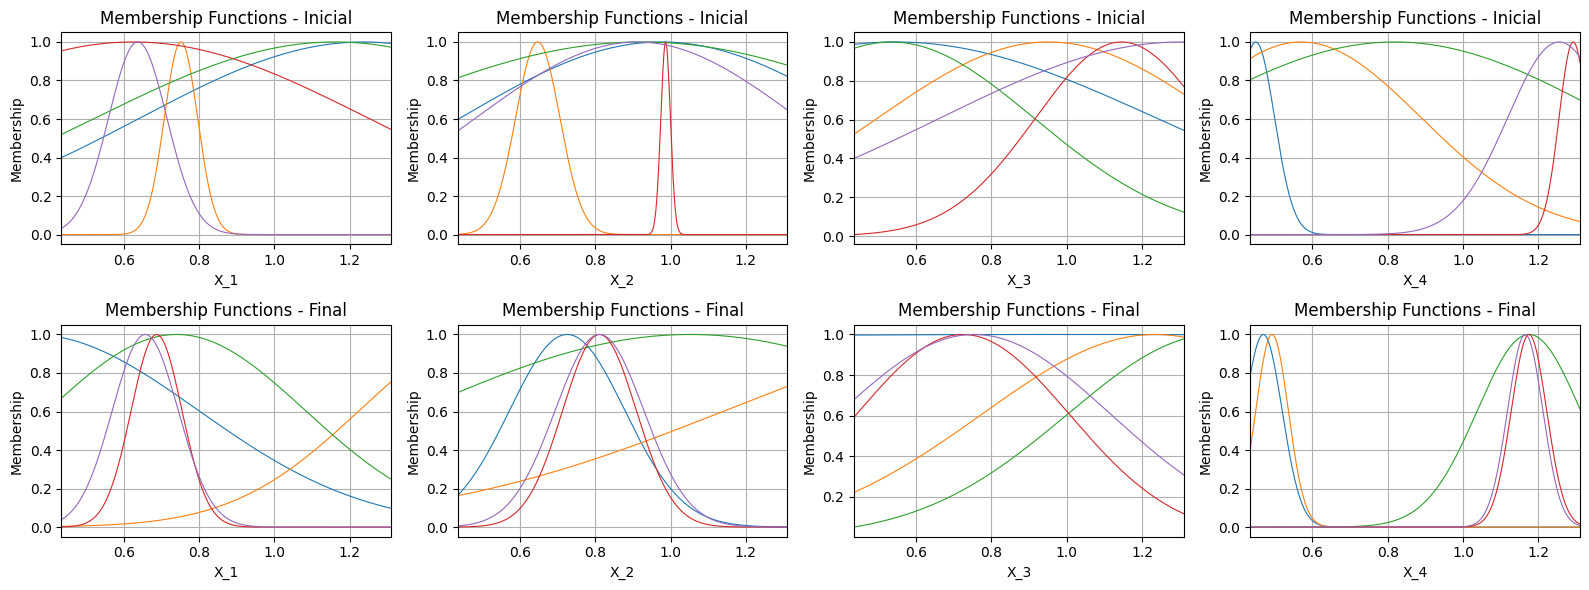

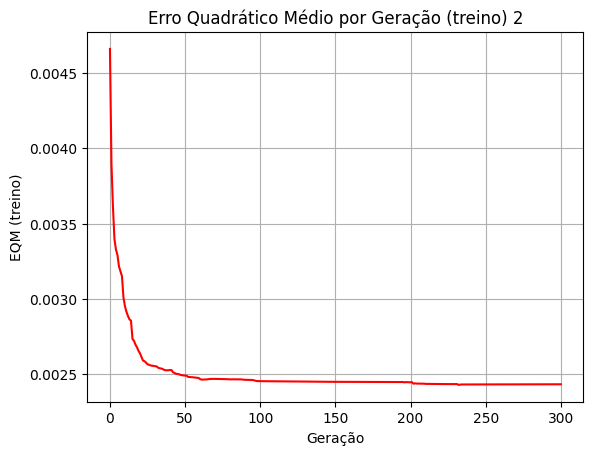

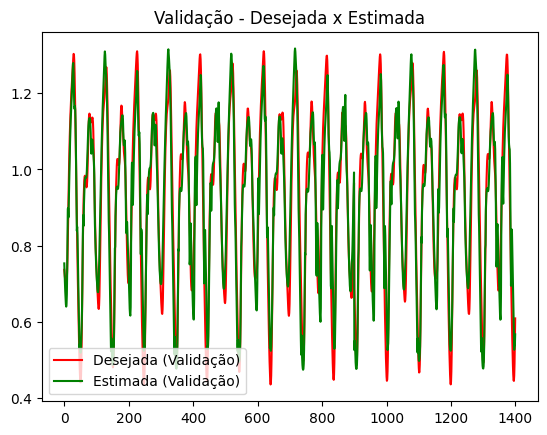

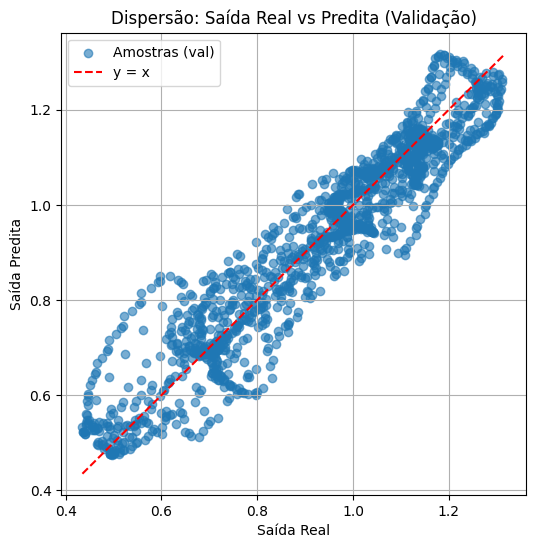


-> Estado final salvo em final_state_3.pkl

Execução:  {4}
-> Estado inicial salvo em init_state_4.pkl (pickle)
Geração 1/300
  Melhora detectada: best_error -> 0.003863 (reset patience)
Geração 2/300
  Melhora detectada: best_error -> 0.003769 (reset patience)
Geração 3/300
  Melhora detectada: best_error -> 0.003711 (reset patience)
Geração 4/300
  Melhora detectada: best_error -> 0.003549 (reset patience)
Geração 5/300
  Melhora detectada: best_error -> 0.003380 (reset patience)
Geração 6/300
  Sem melhora significativa (1/300) - erro atual: 0.003355  melhor: 0.003380
Geração 7/300
  Sem melhora significativa (2/300) - erro atual: 0.003330  melhor: 0.003380
Geração 8/300
  Melhora detectada: best_error -> 0.003321 (reset patience)
Geração 9/300
  Melhora detectada: best_error -> 0.003265 (reset patience)
Geração 10/300
  Sem melhora significativa (1/300) - erro atual: 0.003215  melhor: 0.003265
Geração 11/300
  Melhora detectada: best_error -> 0.003156 (reset patience)
Geração 12/3

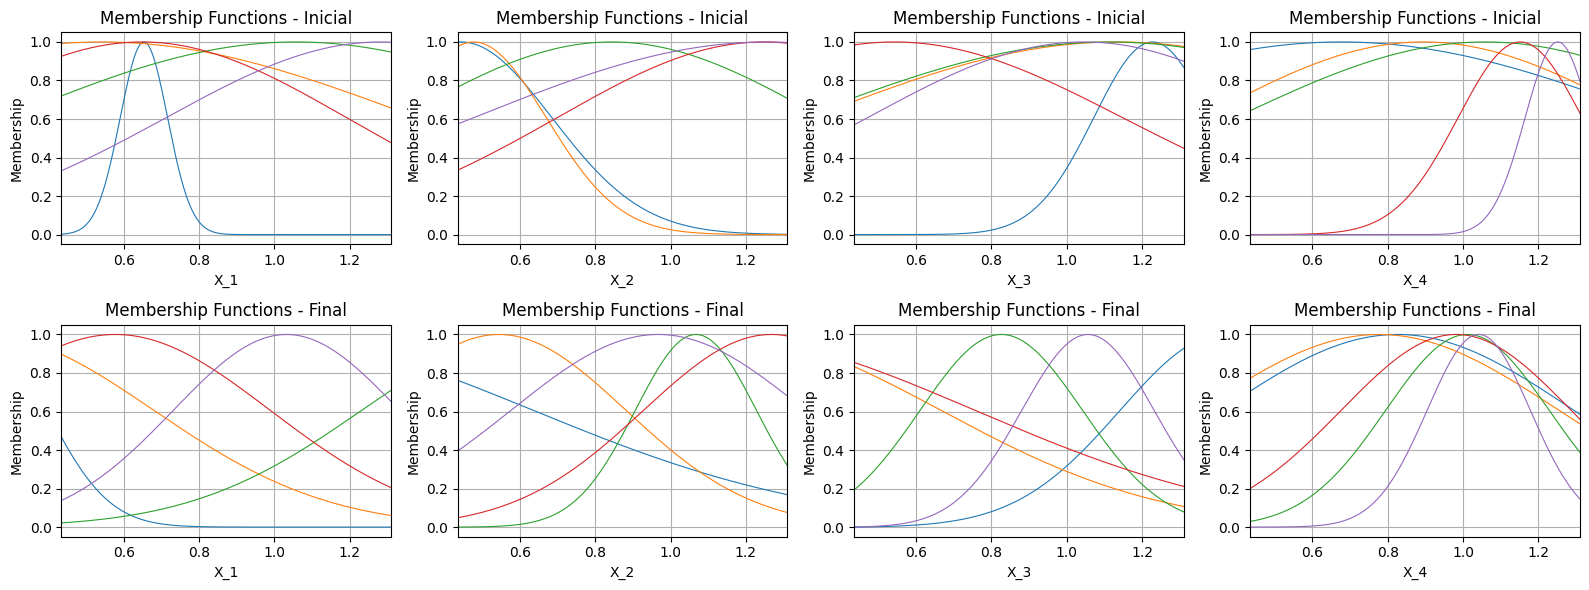

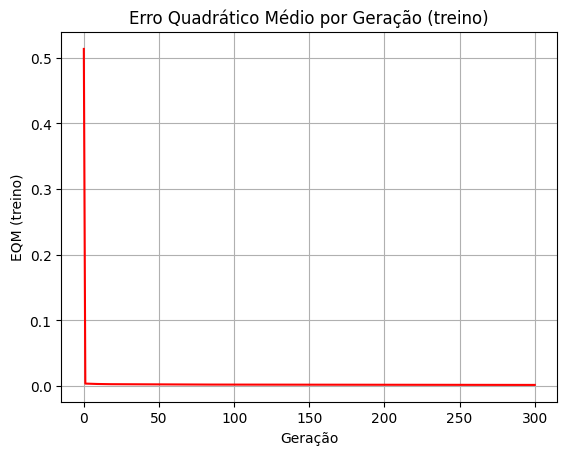

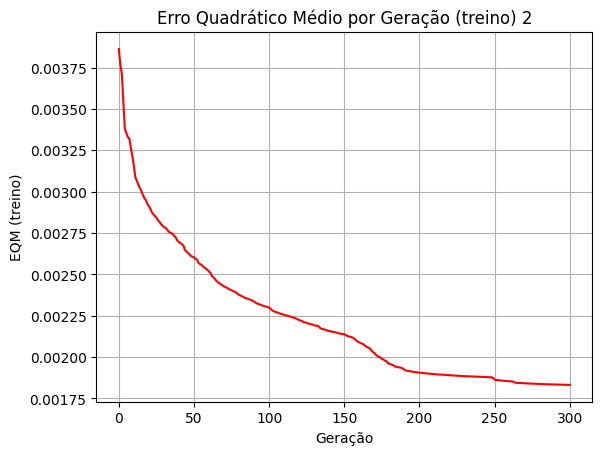

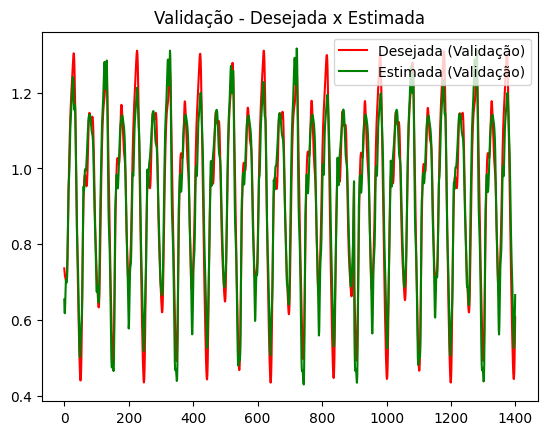


-> Estado final salvo em final_state_4.pkl

Execução:  {5}
-> Estado inicial salvo em init_state_5.pkl (pickle)
Geração 1/300
  Melhora detectada: best_error -> 0.004500 (reset patience)
Geração 2/300
  Melhora detectada: best_error -> 0.003635 (reset patience)
Geração 3/300
  Melhora detectada: best_error -> 0.003518 (reset patience)
Geração 4/300
  Melhora detectada: best_error -> 0.003412 (reset patience)
Geração 5/300
  Melhora detectada: best_error -> 0.003255 (reset patience)
Geração 6/300
  Melhora detectada: best_error -> 0.003159 (reset patience)
Geração 7/300
  Sem melhora significativa (1/300) - erro atual: 0.003124  melhor: 0.003159
Geração 8/300
  Melhora detectada: best_error -> 0.003094 (reset patience)
Geração 9/300
  Sem melhora significativa (1/300) - erro atual: 0.003073  melhor: 0.003094
Geração 10/300
  Melhora detectada: best_error -> 0.003042 (reset patience)
Geração 11/300
  Melhora detectada: best_error -> 0.002982 (reset patience)
Geração 12/300
  Sem melhora

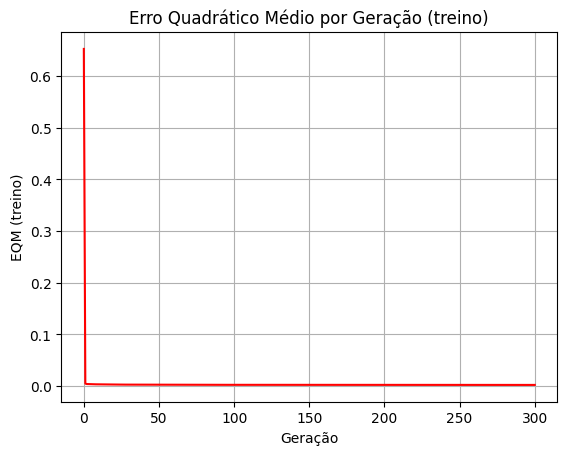

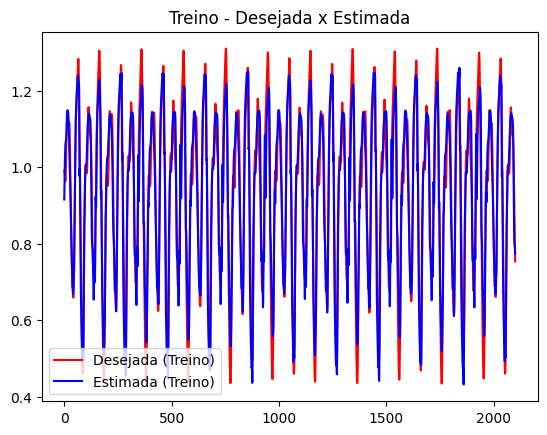

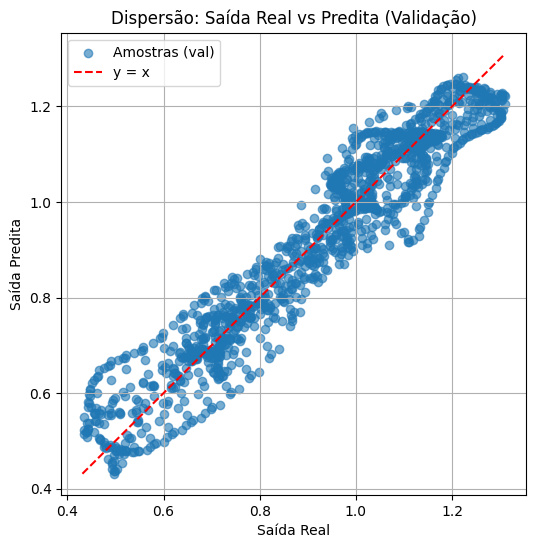


-> Estado final salvo em final_state_5.pkl

Execução:  {6}
-> Estado inicial salvo em init_state_6.pkl (pickle)
Geração 1/300
  Melhora detectada: best_error -> 0.003791 (reset patience)
Geração 2/300
  Melhora detectada: best_error -> 0.003559 (reset patience)
Geração 3/300
  Melhora detectada: best_error -> 0.003390 (reset patience)
Geração 4/300
  Sem melhora significativa (1/300) - erro atual: 0.003364  melhor: 0.003390
Geração 5/300
  Sem melhora significativa (2/300) - erro atual: 0.003350  melhor: 0.003390
Geração 6/300
  Melhora detectada: best_error -> 0.003339 (reset patience)
Geração 7/300
  Sem melhora significativa (1/300) - erro atual: 0.003331  melhor: 0.003339
Geração 8/300
  Melhora detectada: best_error -> 0.003286 (reset patience)
Geração 9/300
  Sem melhora significativa (1/300) - erro atual: 0.003289  melhor: 0.003286
Geração 10/300
  Sem melhora significativa (2/300) - erro atual: 0.003291  melhor: 0.003286
Geração 11/300
  Sem melhora significativa (3/300) - err

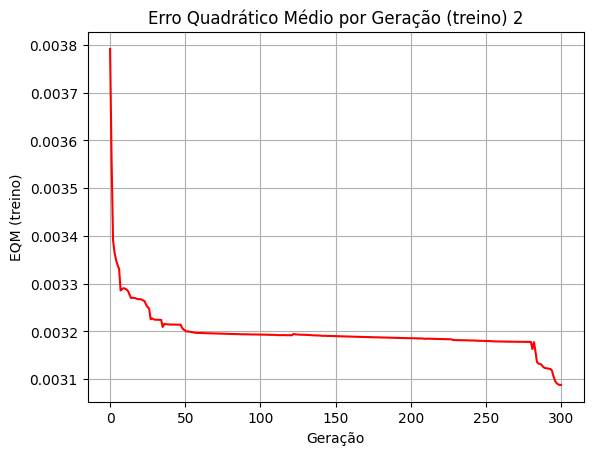


-> Estado final salvo em final_state_6.pkl

Execução:  {7}
-> Estado inicial salvo em init_state_7.pkl (pickle)
Geração 1/300
  Melhora detectada: best_error -> 0.004132 (reset patience)
Geração 2/300
  Melhora detectada: best_error -> 0.003587 (reset patience)
Geração 3/300
  Melhora detectada: best_error -> 0.003280 (reset patience)
Geração 4/300
  Melhora detectada: best_error -> 0.003193 (reset patience)
Geração 5/300
  Melhora detectada: best_error -> 0.003084 (reset patience)
Geração 6/300
  Melhora detectada: best_error -> 0.002712 (reset patience)
Geração 7/300
  Melhora detectada: best_error -> 0.002634 (reset patience)
Geração 8/300
  Sem melhora significativa (1/300) - erro atual: 0.002620  melhor: 0.002634
Geração 9/300
  Sem melhora significativa (2/300) - erro atual: 0.002609  melhor: 0.002634
Geração 10/300
  Sem melhora significativa (3/300) - erro atual: 0.002586  melhor: 0.002634
Geração 11/300
  Melhora detectada: best_error -> 0.002495 (reset patience)
Geração 12/3

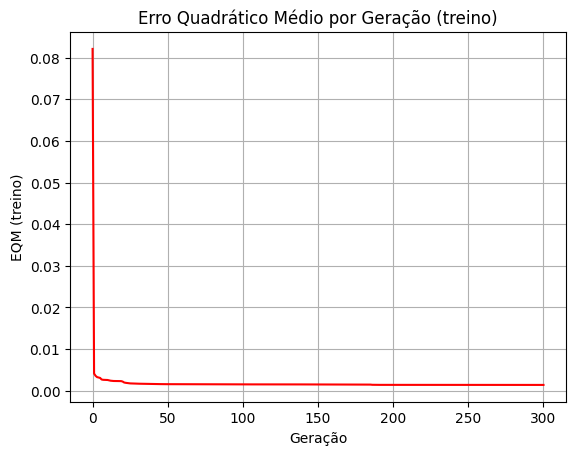

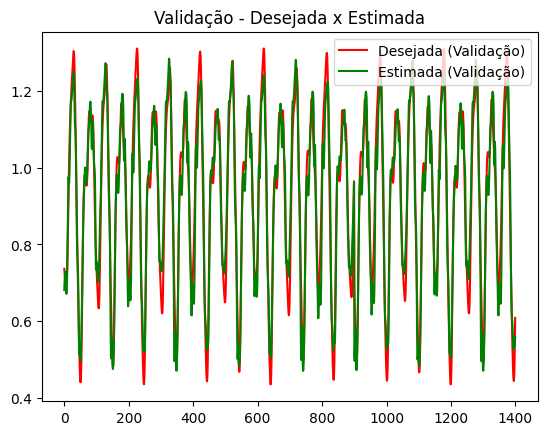


-> Estado final salvo em final_state_7.pkl

Execução:  {8}
-> Estado inicial salvo em init_state_8.pkl (pickle)
Geração 1/300
  Melhora detectada: best_error -> 0.003490 (reset patience)
Geração 2/300
  Melhora detectada: best_error -> 0.003114 (reset patience)
Geração 3/300
  Melhora detectada: best_error -> 0.003055 (reset patience)
Geração 4/300
  Melhora detectada: best_error -> 0.002964 (reset patience)
Geração 5/300
  Sem melhora significativa (1/300) - erro atual: 0.002918  melhor: 0.002964
Geração 6/300
  Melhora detectada: best_error -> 0.002875 (reset patience)
Geração 7/300
  Sem melhora significativa (1/300) - erro atual: 0.002860  melhor: 0.002875
Geração 8/300
  Sem melhora significativa (2/300) - erro atual: 0.002836  melhor: 0.002875
Geração 9/300
  Melhora detectada: best_error -> 0.002809 (reset patience)
Geração 10/300
  Sem melhora significativa (1/300) - erro atual: 0.002796  melhor: 0.002809
Geração 11/300
  Sem melhora significativa (2/300) - erro atual: 0.00278

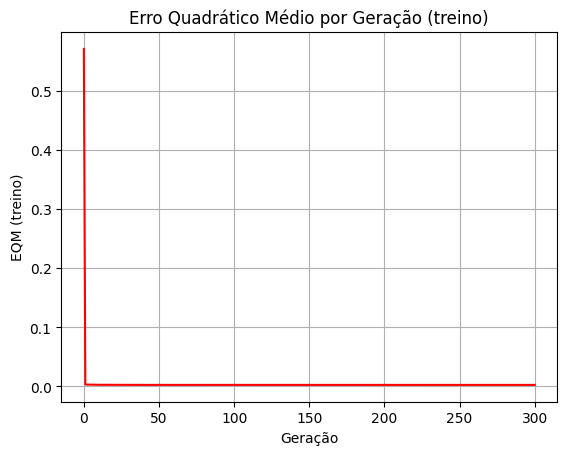

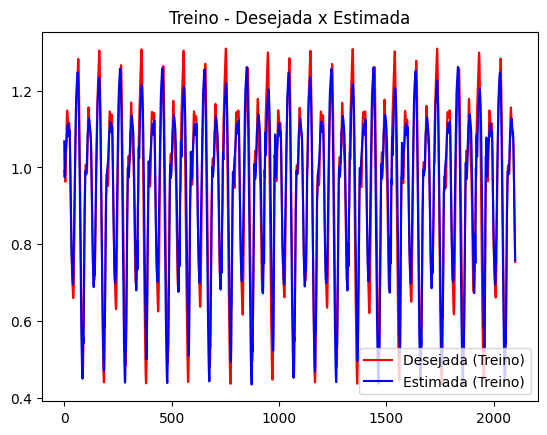

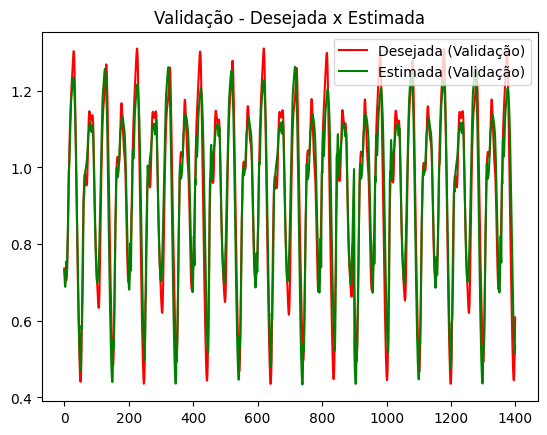


-> Estado final salvo em final_state_8.pkl

Execução:  {9}
-> Estado inicial salvo em init_state_9.pkl (pickle)
Geração 1/300
  Melhora detectada: best_error -> 0.003950 (reset patience)
Geração 2/300
  Melhora detectada: best_error -> 0.003696 (reset patience)
Geração 3/300
  Melhora detectada: best_error -> 0.003556 (reset patience)
Geração 4/300
  Sem melhora significativa (1/300) - erro atual: 0.003512  melhor: 0.003556
Geração 5/300
  Melhora detectada: best_error -> 0.003470 (reset patience)
Geração 6/300
  Sem melhora significativa (1/300) - erro atual: 0.003435  melhor: 0.003470
Geração 7/300
  Melhora detectada: best_error -> 0.003392 (reset patience)
Geração 8/300
  Sem melhora significativa (1/300) - erro atual: 0.003383  melhor: 0.003392
Geração 9/300
  Sem melhora significativa (2/300) - erro atual: 0.003372  melhor: 0.003392
Geração 10/300
  Sem melhora significativa (3/300) - erro atual: 0.003360  melhor: 0.003392
Geração 11/300
  Melhora detectada: best_error -> 0.0031

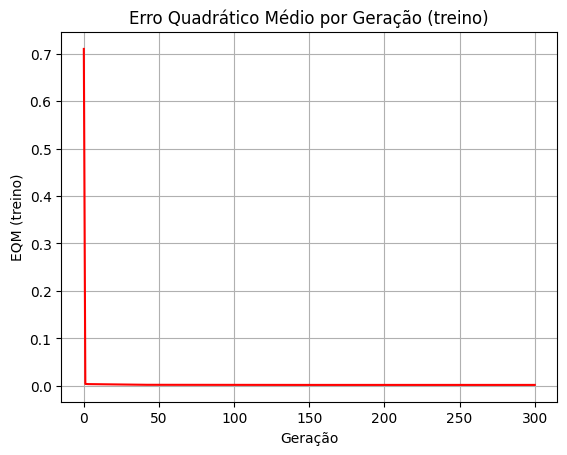

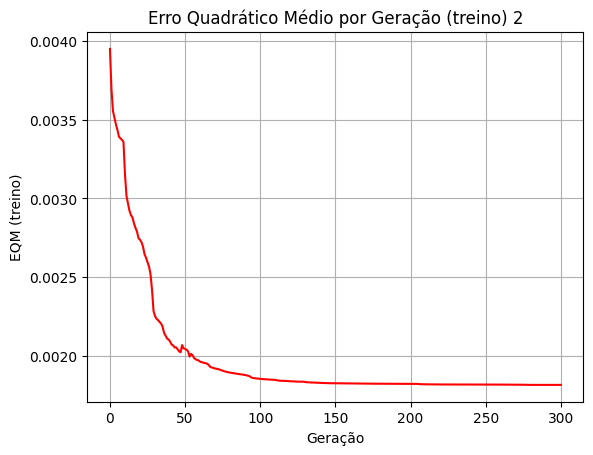

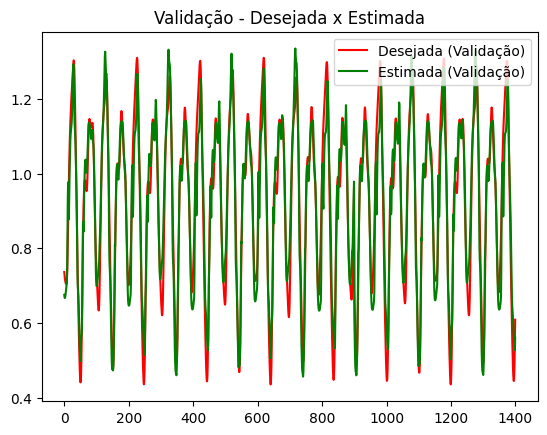


-> Estado final salvo em final_state_9.pkl

Execução:  {10}
-> Estado inicial salvo em init_state_10.pkl (pickle)
Geração 1/300
  Melhora detectada: best_error -> 0.003547 (reset patience)
Geração 2/300
  Melhora detectada: best_error -> 0.003465 (reset patience)
Geração 3/300
  Melhora detectada: best_error -> 0.003407 (reset patience)
Geração 4/300
  Sem melhora significativa (1/300) - erro atual: 0.003364  melhor: 0.003407
Geração 5/300
  Melhora detectada: best_error -> 0.003302 (reset patience)
Geração 6/300
  Melhora detectada: best_error -> 0.003230 (reset patience)
Geração 7/300
  Sem melhora significativa (1/300) - erro atual: 0.003205  melhor: 0.003230
Geração 8/300
  Sem melhora significativa (2/300) - erro atual: 0.003181  melhor: 0.003230
Geração 9/300
  Melhora detectada: best_error -> 0.003139 (reset patience)
Geração 10/300
  Sem melhora significativa (1/300) - erro atual: 0.003115  melhor: 0.003139
Geração 11/300
  Melhora detectada: best_error -> 0.003061 (reset pati

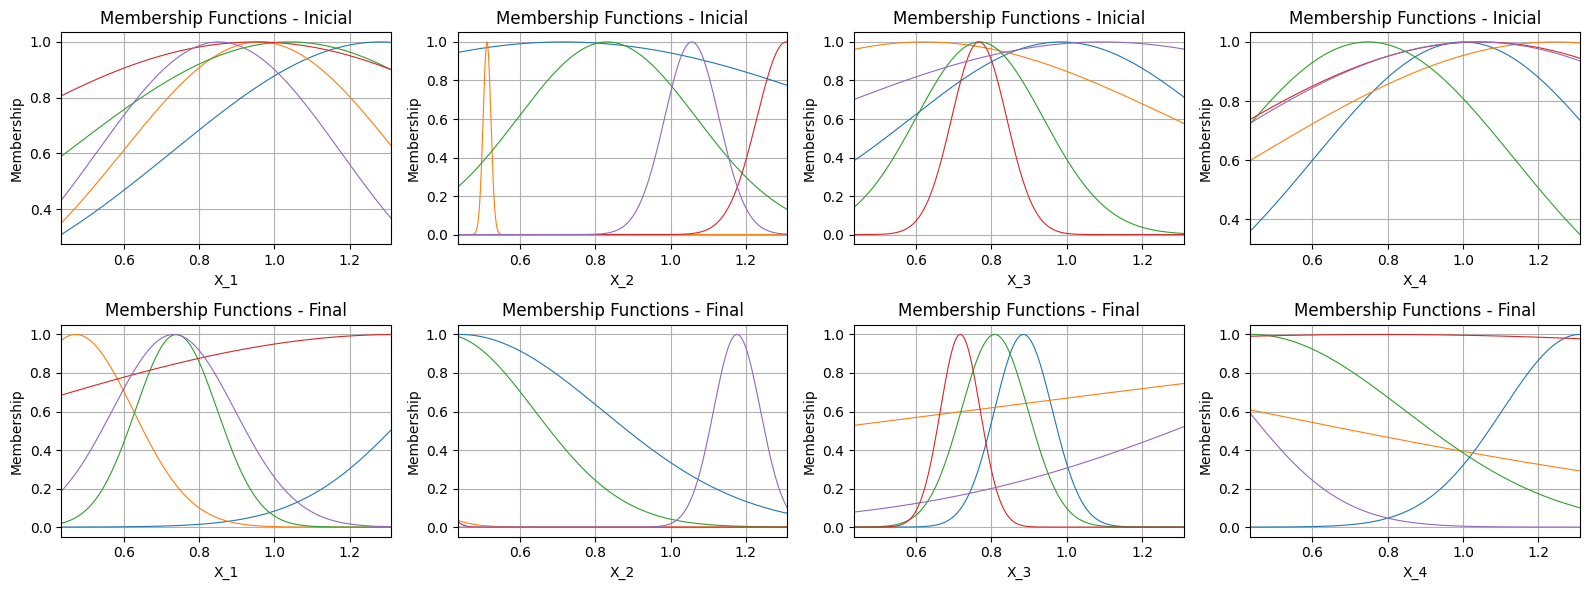

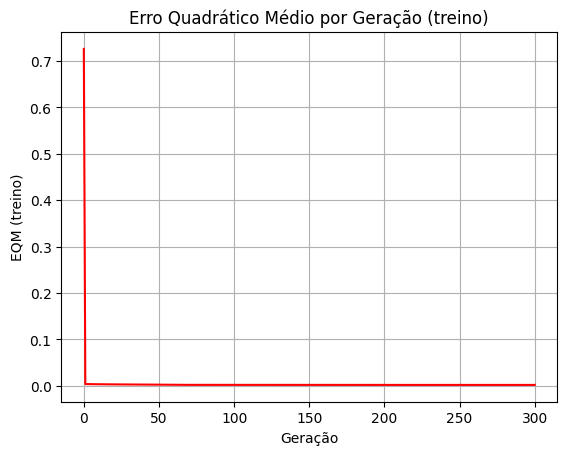

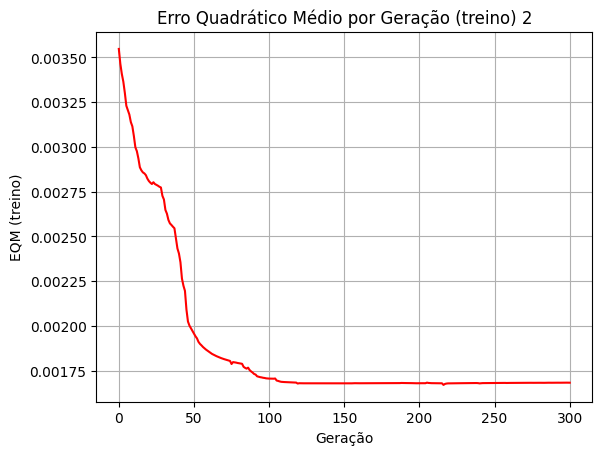

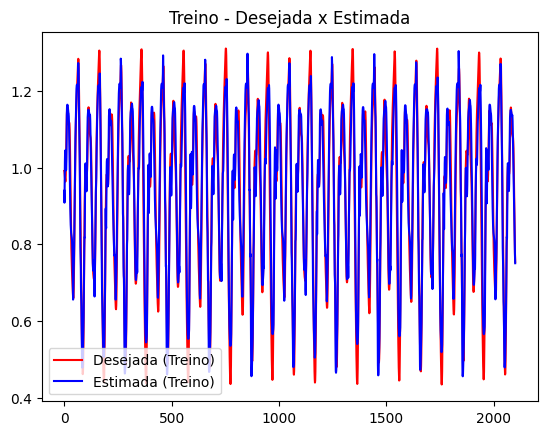

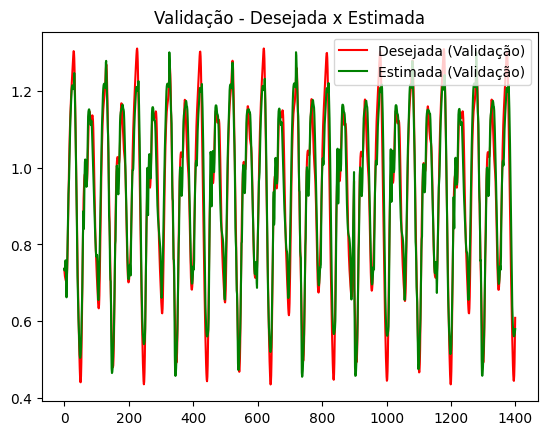

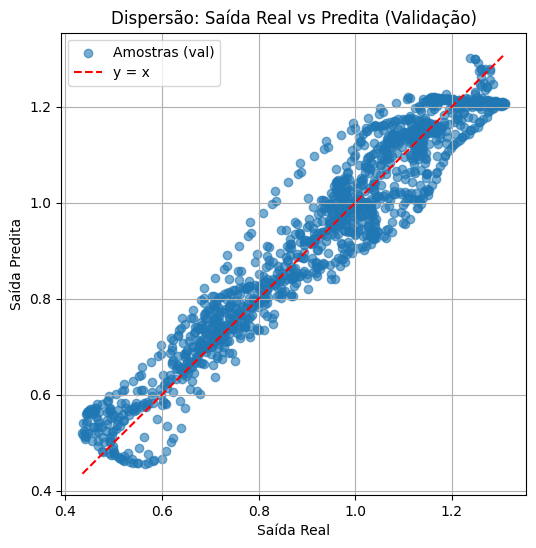


-> Estado final salvo em final_state_10.pkl



In [2]:
for exec_id  in range(11):
    print(f"Execução: ", {exec_id })
    # -------------------------
    # Inicialização de p e q
    # -------------------------
    rng = np.random.default_rng()
    p = rng.random((nin, NFP_INIT))
    q = rng.random(NFP_INIT)

    # -------------------------
    # Gera população inicial
    # cada indivíduo terá chaves: 'nfps', 'cs', 'ss', 'saida', 'fitness'
    # -------------------------
    pop = []
    for z in range(TAM_POP):
        nfpSort = NFP_INIT
        cs = np.empty((nin, nfpSort))
        ss = np.empty((nin, nfpSort))
        for j in range(nfpSort):
            for i in range(nin):
                cs[i, j] = xmin[i] + rng.random() * (xmax[i] - xmin[i])
                ss[i, j] = rng.random() * (xmax[i] - xmin[i])

        indiv = {'nfps': nfpSort, 'cs': cs, 'ss': ss}
        saida_full = saida.saida(xt, cs, ss, p, q, nfpSort)
        y_pred = extract_prediction(saida_full)
        indiv['saida'] = y_pred
        indiv['fitness'] = (0.5 * np.sum((indiv['saida'] - ydt) ** 2)) / npt
        pop.append(indiv)

    init_dump = {
        'pop': pop,
        'p': p.copy(),
        'q': q.copy(),
        'params': {
            'NFP_INIT': NFP_INIT, 'TAM_POP': TAM_POP, 'NUM_GERACOES': NUM_GERACOES,
            'TAXA_CRUZA': TAXA_CRUZA, 'TAXA_MUTA': TAXA_MUTA
        },
        'xmin': xmin, 'xmax': xmax,
        'rng_state': rng.bit_generator.state
    }
    with open(f'init_state_{exec_id }.pkl', 'wb') as f:
        pickle.dump(init_dump, f, protocol=pickle.HIGHEST_PROTOCOL)

    print(f"-> Estado inicial salvo em init_state_{exec_id }.pkl (pickle)")

    # identifica melhor indivíduo inicial (índice)
    melhorindv = int(np.argmin([ind['fitness'] for ind in pop]))

    # inicializa parâmetros com o melhor indivíduo
    c = pop[melhorindv]['cs'].copy()
    s = pop[melhorindv]['ss'].copy()
    nfp = pop[melhorindv]['nfps']
    novapop = pop.copy()

    # -------------------------
    # Preparar xval para plot das MF (apenas para primeira feature)
    # -------------------------
    xval = np.linspace(xmin[0], xmax[0], npt)

    # configurar figura MF (2 linhas: inicial e final; colunas = nin)
    fig_mf, axes = plt.subplots(2, max(1, nin), figsize=(4 * max(1, nin), 6))
    axes = np.array(axes)
    if axes.ndim == 1:
        axes = axes.reshape(2, 1)
    elif axes.shape[0] != 2:
        axes = axes.reshape(2, nin)

    # plot MFs iniciais
    for j in range(nfp):
        for i in range(nin):
            w = gaussmf(xval, c[i, j], s[i, j])
            ax = axes[0, i]
            ax.plot(xval, w, linewidth=0.8)
            if j == 0:
                ax.set_title('Membership Functions - Inicial')
            ax.set_xlabel(f'X_{i+1}')
            ax.set_ylabel('Membership')
            ax.set_xlim(xmin[i], xmax[i])
            ax.grid(True)

    # -------------------------
    # Saída inicial sem treinamento
    # -------------------------
    yst = extract_prediction(saida.saida(xt, c, s, p, q, nfp))
    ysv = extract_prediction(saida.saida(xv, c, s, p, q, nfp))

    # -------------------------
    # Treinamento (laço de gerações + atualização p,q por época)
    # -------------------------
    erro = []
    erro2 = []
    y_train_pred = yst.copy()

    # inicializa early stopping
    best_error = (0.5 * np.sum((y_train_pred - ydt) ** 2)) / npt
    no_improve_count = 0

    for gen in range(NUM_GERACOES):
        print(f'Geração {gen+1}/{NUM_GERACOES}')
        # erro antes das atualizações p,q desta geração (apêndice para histórico)
        erro.append((0.5 * np.sum((y_train_pred - ydt) ** 2)) / npt)
        dyjdqj = 1.0

        # atualização estilo gradiente para p e q
        for _ in range(NEPOCA):
            for k in range(npt):
                sample = xt[k, :]
                ys_full = saida.saida(sample, c, s, p, q, nfp)
                ys = scalar_of(ys_full[0])
                w = np.asarray(ys_full[1]).ravel()
                y_vec = np.asarray(ys_full[2]).ravel()
                b = scalar_of(ys_full[3])

                dedys = float(ys) - float(ydt[k])

                for j in range(nfp):
                    dysdyj = w[j] / b
                    for i in range(nin):
                        dyjdpj = sample[i]
                        p[i, j] = p[i, j] - ((ALFA) * dedys * dysdyj * dyjdpj)
                    q[j] = q[j] - ((ALFA) * dedys * dysdyj * dyjdqj)

        # aplicar operador genético para gerar nova população
        pop = gerarnovapop.gerarnovapop(pop, melhorindv, TAM_POP, TAXA_CRUZA, TAXA_MUTA, xmax, xmin)

        for z in range(TAM_POP):
            # O step_size define o tamanho do ajuste fino
            pop[z] = buscalocal.busca_local_antecedentes(
                pop[z], xt, ydt, p, q, pop[z]['nfps'], step_size=0.01
            )

        # re-avaliar fitness da nova população (sempre usando os pesos p,q atuais e dados de treino)
        for z in range(TAM_POP):
            indiv = pop[z]
            saida_full = saida.saida(xt, indiv['cs'], indiv['ss'], p, q, indiv['nfps'])
            y_pred = extract_prediction(saida_full)
            indiv['saida'] = y_pred
            indiv['fitness'] = (0.5 * np.sum((indiv['saida'] - ydt) ** 2)) / npt

        # atualizar melhor indivíduo
        melhorindv = int(np.argmin([ind['fitness'] for ind in pop]))

        # atualizar parâmetros a partir do melhor indivíduo
        c = pop[melhorindv]['cs'].copy()
        s = pop[melhorindv]['ss'].copy()
        nfp = pop[melhorindv]['nfps']

        # recomputar predição de treino com parâmetros atualizados
        y_train_pred = extract_prediction(saida.saida(xt, c, s, p, q, nfp))
        current_error = (0.5 * np.sum((y_train_pred - ydt) ** 2)) / npt
        erro2.append(current_error)

        # -------------------------
        # Early stopping check
        # -------------------------
        # Considera melhoria significativa se a redução for maior que MIN_DELTA
        if best_error - current_error > MIN_DELTA:
            best_error = current_error
            no_improve_count = 0
            print(f'  Melhora detectada: best_error -> {best_error:.6f} (reset patience)')
        else:
            no_improve_count += 1
            print(f'  Sem melhora significativa ({no_improve_count}/{PATIENCE}) - erro atual: {current_error:.6f}  melhor: {best_error:.6f}')

        if no_improve_count >= PATIENCE:
            print(f'==> Early stopping acionado na geração {gen+1}. '
                f'Nenhuma melhora > {MIN_DELTA} por {PATIENCE} gerações. '
                f'Erro final: {current_error:.6f}')
            break

    # adiciona último erro (mantive sua lógica original para histórico)
    erro.append((0.5 * np.sum((y_train_pred - ydt) ** 2)) / npt)
    erro2.append((0.5 * np.sum((y_train_pred - ydt) ** 2)) / npt)

    # -------------------------
    # Predições finais (com os parâmetros finais)
    # -------------------------
    y_train_pred_final = extract_prediction(saida.saida(xt, c, s, p, q, nfp))
    y_val_pred_final = extract_prediction(saida.saida(xv, c, s, p, q, nfp))

    end_time = time.time()
    print(f"Tempo de execução: {end_time - start_time:.3f} s")

    c = np.array(c)
    s = np.array(s)

    # -------------------------
    # Métricas (validação e teste)
    # -------------------------
    mse_val = 0.5 * mean_squared_error(ydv, y_val_pred_final)
    rmse_val = np.sqrt(mse_val)
    r2_val = r2_score(ydv, y_val_pred_final)

    mse_train = 0.5 * mean_squared_error(ydt, y_train_pred_final)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(ydt, y_train_pred_final)

    print("\n===== MÉTRICAS =====")
    print(f"Treino   -> RMSE: {rmse_train:.6f}  R2: {r2_train:.6f}")
    print(f"Validação-> RMSE: {rmse_val:.6f}  R2: {r2_val:.6f}")

    # -------------------------
    # Plots finais: MFs finais, erro por geração, comparativos treino/val
    # -------------------------

    # MFs finais
    for j in range(nfp):
        for i in range(nin):
            w = gaussmf(xval, c[i, j], s[i, j])
            ax = axes[1, i]
            ax.plot(xval, w, linewidth=0.8)
            if j == 0:
                ax.set_title('Membership Functions - Final')
            ax.set_xlabel(f'X_{i+1}')
            ax.set_ylabel('Membership')
            ax.set_xlim(xmin[i], xmax[i])
            ax.grid(True)
    fig_mf.tight_layout()

    # Erro por geração
    plt.figure()
    plt.plot(erro, 'r', linewidth=1.5)
    plt.xlabel('Geração')
    plt.ylabel('EQM (treino)')
    plt.title('Erro Quadrático Médio por Geração (treino)')
    plt.grid(True)

    # Erro por geração
    plt.figure()
    plt.plot(erro2, 'r', linewidth=1.5)
    plt.xlabel('Geração')
    plt.ylabel('EQM (treino)')
    plt.title('Erro Quadrático Médio por Geração (treino) 2')
    plt.grid(True)

    # # Plots comparativos (treino e validação)
    # fig3, axs = plt.subplots(2, 3, figsize=(15, 8))

    # # Treino - desejada vs inicial vs final
    # axs[0, 0].plot(ydt, 'r', label='Saída Desejada (Treino)')
    # axs[0, 0].plot(yst, 'k', label='Saída Inicial (Treino)')
    # axs[0, 0].legend()
    # axs[0, 0].set_title('Treino - Desejada x Inicial')

    # axs[0, 1].plot(y_train_pred_final, label='Saída Final (Treino)')
    # axs[0, 1].set_title('Treino - Saída Final')

    # axs[0, 2].plot(ydt, 'r', label='Saída Desejada (Treino)')
    # axs[0, 2].plot(y_train_pred_final, 'g', label='Saída Final (Treino)')
    # axs[0, 2].legend()
    # axs[0, 2].set_title('Treino - Desejada x Final')

    # # Validação - desejada vs inicial vs final
    # axs[1, 0].plot(ydv, 'r', label='Saída Desejada (Val)')
    # axs[1, 0].plot(ysv, 'k', label='Saída Inicial (Val)')
    # axs[1, 0].legend()
    # axs[1, 0].set_title('Validação - Desejada x Inicial')

    # axs[1, 1].plot(y_val_pred_final, label='Saída Final (Val)')
    # axs[1, 1].set_title('Validação - Saída Final')

    # axs[1, 2].plot(ydv, 'r', label='Saída Desejada (Val)')
    # axs[1, 2].plot(y_val_pred_final, 'g', label='Saída Final (Val)')
    # axs[1, 2].legend()
    # axs[1, 2].set_title('Validação - Desejada x Final')

    # fig3.tight_layout()

    # Figuras finais simples (treino, val)
    plt.figure()
    plt.plot(ydt, 'r', label='Desejada (Treino)')
    plt.plot(y_train_pred_final, 'b', label='Estimada (Treino)')
    plt.title('Treino - Desejada x Estimada')
    plt.legend()

    plt.figure()
    plt.plot(ydv, 'r', label='Desejada (Validação)')
    plt.plot(y_val_pred_final, 'g', label='Estimada (Validação)')
    plt.title('Validação - Desejada x Estimada')
    plt.legend()

    # Scatter: Real vs Predito (Validação)
    plt.figure(figsize=(6, 6))
    plt.scatter(ydv, y_val_pred_final, alpha=0.6, label='Amostras (val)')
    min_val = min(np.nanmin(ydv) if len(ydv) > 0 else 0, np.nanmin(y_val_pred_final) if len(y_val_pred_final) > 0 else 0)
    max_val = max(np.nanmax(ydv) if len(ydv) > 0 else 1, np.nanmax(y_val_pred_final) if len(y_val_pred_final) > 0 else 1)
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=1.5, label='y = x')
    plt.title('Dispersão: Saída Real vs Predita (Validação)')
    plt.xlabel('Saída Real')
    plt.ylabel('Saída Predita')
    plt.legend()
    plt.grid(True)

    plt.show()

    final_dump = {
    'c_final': c.copy(),
    's_final': s.copy(),
    'p_final': p.copy(),
    'q_final': q.copy(),
    'nfp_final': nfp,

    # métricas finais
    'rmse_train': float(rmse_train),
    'r2_train': float(r2_train),
    'rmse_val': float(rmse_val),
    'r2_val': float(r2_val),

    # erros por geração
    'erro_hist_1': erro,
    'erro_hist_2': erro2,

    # dados usados
    'xt': xt,
    'ydt': ydt,
    'xv': xv,
    'ydv': ydv,

    # tempo e parâmetros do treinamento
    'tempo_total_s': end_time - start_time,
    'num_geracoes': NUM_GERACOES,
    'geracao_final': gen + 1,   # gen vem do loop
    'early_stop': (no_improve_count >= PATIENCE)
    }

    with open(f'final_state_{exec_id}.pkl', 'wb') as f:
        pickle.dump(final_dump, f, protocol=pickle.HIGHEST_PROTOCOL)

    print(f"\n-> Estado final salvo em final_state_{exec_id}.pkl\n")


In [3]:
rmse = []
for file in range(11):
    with open(f'final_state_{file}.pkl', 'rb') as arquivo:
                objeto_carregado = pickle.load(arquivo)
                rmse.append(objeto_carregado['rmse_val'])  
                
rmse = np.array(rmse)

In [5]:
rmse

array([0.04934825, 0.04708442, 0.04770092, 0.05248825, 0.04544139,
       0.04643332, 0.05832651, 0.03945664, 0.05369807, 0.04492348,
       0.0435161 ])

In [4]:
rmse.mean()

np.float64(0.04803794122514589)